# Defacing pre-registration - Statistical analysis on manual ratings in R

## Load simulated manual ratings

In [1]:
df <- readRDS(file="SimulatedDefacedRatings.Rda")

The simulated data were generated by running the `SimulateDefacedRatings.ipnyb` notebook.

## Continuation ratio mixed effects regression

The ratings are ordinal, i.e. categorical variables with a natural ordering of their levels. In order to model raters’ variabilities, we will use mixed effects regression from the GLMMadaptive package in R. This analysis is inspired from https://drizopoulos.github.io/GLMMadaptive/articles/Ordinal_Mixed_Models.html.

The backward formulation is commonly used when progression through ratings from excluded, poor, good, excellent, is represented by increasing integer values, and interest lies in estimating the odds of better quality compared to worst quality. The forward formulation specifies that subjects have to ‘pass through’ one category to get to the next one. The backward formulation is thus suitable for our analysis.

An advantage of the continuation ratio model is that its likelihood can be easily re-expressed such that it can be fitted with software the fits (mixed effects) logistic regression. This formulation requires a couple of data management steps creating separate records for each measurement, and suitably replicating the corresponding rows of the design matrices Xi and Zi. In addition, a new ‘cohort’ variable is constructed denoting at which category the specific measurement of i-th subject belongs. An extra advantage of this formulation is that we can easily evaluate if specific covariates satisfy the ordinality assumption (i.e., that their coefficients are independent of the category k) by including into the model their interaction with the ‘cohort’ variable and testing its significance.


In [2]:
library(GLMMadaptive)

## Data set-up and calculation of marginal probabilites from a continuation ratio model
cr_vals <- cr_setup(df$ratings, direction = "backward")
cr_data <- df[cr_vals$subs, ]
cr_data$ratings_new <- cr_vals$y
cr_data$cohort <- cr_vals$cohort

## Fits generalized linear mixed effects model
fm <- mixed_model(ratings_new ~ cohort + defaced + rater, random = ~ 1 | rater, data = cr_data, family = binomial(), na.action = na.exclude)
fm


Call:
mixed_model(fixed = ratings_new ~ cohort + defaced + rater, random = ~1 | 
    rater, data = cr_data, family = binomial(), na.action = na.exclude)


Model:
 family: binomial
 link: logit 

Random effects covariance matrix:
                 StdDev
(Intercept) 0.008925754

Fixed effects:
      (Intercept)     cohorty<=good cohorty<=excluded   defacedoriginal 
      -1.14540902        0.36744167        0.63890019        0.24176307 
     raterrater02      raterrater03      raterrater04      raterrater05 
       0.05460401       -0.01331789        0.05487522       -0.04271667 
     raterrater06      raterrater07      raterrater08      raterrater09 
      -0.01129911       -0.06669695       -0.17371685       -0.04689559 
     raterrater10      raterrater11      raterrater12 
      -0.09130086       -0.23690480       -0.23465100 

log-Lik: -19044.54


In [3]:
cr_data

,sub,defaced,rater,ratings,ratings_new,cohort
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,1,original,rater01,excellent,0,all
1.1,1,original,rater01,excellent,0,y<=good
1.2,1,original,rater01,excellent,0,y<=excluded
2,1,defaced,rater01,excellent,0,all
2.1,1,defaced,rater01,excellent,0,y<=good
2.2,1,defaced,rater01,excellent,0,y<=excluded
3,2,original,rater01,poor,1,all
4,2,defaced,rater01,poor,1,all
5,3,original,rater01,poor,1,all


`random = ~ 1 | rater` enables to account for between-raters variability. This formula lets the intercept take a different value for each rater.

### Relaxing continuation ratio assumption

We can relax the ordinality assumption for the defaced variable, namely, allowing that the effect of defaced is different for each of the response categories of our ordinal outcome y. This can be achieved by simply including the interaction term between the defaced and cohort variables.

In [4]:
gm <- mixed_model(ratings_new ~ cohort * defaced + rater, random = ~ 1 | rater, data = cr_data, family = binomial())
gm


Call:
mixed_model(fixed = ratings_new ~ cohort * defaced + rater, random = ~1 | 
    rater, data = cr_data, family = binomial())


Model:
 family: binomial
 link: logit 

Random effects covariance matrix:
                 StdDev
(Intercept) 0.008951209

Fixed effects:
                      (Intercept)                     cohorty<=good 
                     -1.021565402                       0.365773913 
                cohorty<=excluded                   defacedoriginal 
                      0.128507123                       0.002305759 
                     raterrater02                      raterrater03 
                      0.055565396                      -0.012075236 
                     raterrater04                      raterrater05 
                      0.055043500                      -0.043024207 
                     raterrater06                      raterrater07 
                     -0.012470938                      -0.069078927 
                     raterrater08       

To test whether these extensions are required we can perform a likelihood ratio test using the anova() method:

In [5]:
anova(fm,gm)


        AIC      BIC   log.Lik    LRT df p.value
fm 38121.07 38128.83 -19044.54                  
gm 37845.03 37853.76 -18904.52 280.04  2 <0.0001


**Discussion** The first test rejects the null hypothesis meaning that defaced doesn't satisfy the continuous ratio assumption => the addition of the interaction term cohort x defaced is thus necessary.

**We also test whether we need to relax the ordinality assumption for the rater predictor.**

In [6]:
#gm2 <- mixed_model(ratings_new ~ cohort * defaced + cohort * rater, random = ~ 1 | rater, data = cr_data, family = binomial())
#gm2

In [7]:
#anova(gm, gm2)

**Discussion** The second test doesn't reject the null hypothesis, meaning that rater satisfied the continuation ratio assumption, thus the interaction term cohort x rater is not necessary.

gm is our final model.

### Effect plot of conditional probabilities

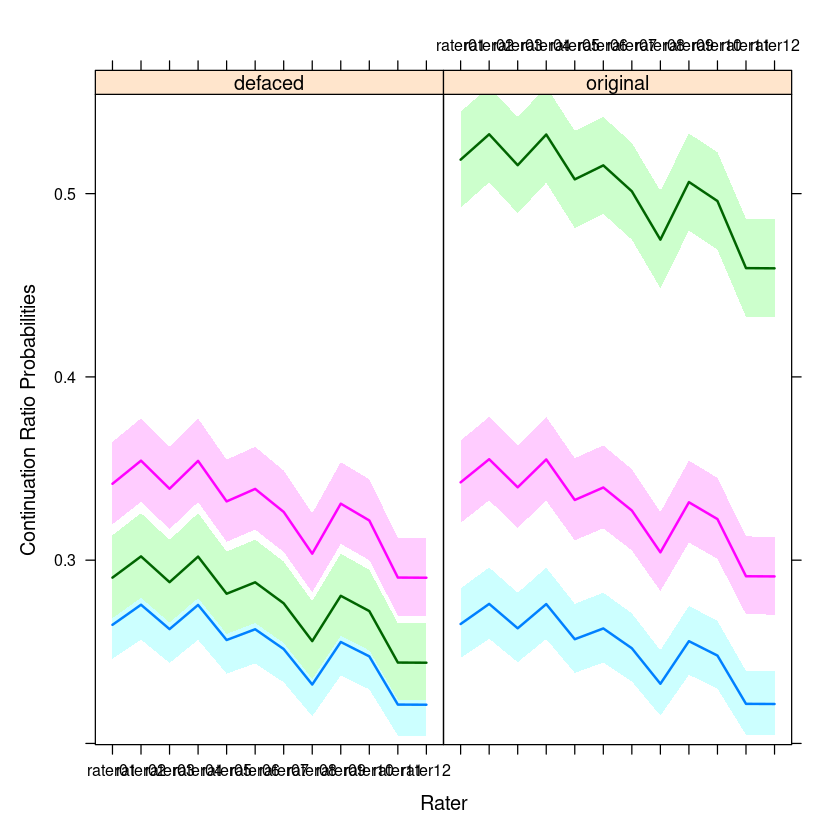

In [8]:
library(lattice)

#Extract data necessary to plot
nDF <- with(cr_data, expand.grid(cohort = levels(cohort), defaced = levels(defaced), 
                                 rater = unique(rater)))

plot_data <- effectPlotData(gm, nDF, direction="backward")

#Plot
expit <- function (x) exp(x) / (1 + exp(x))
my_panel_bands <- function(x, y, upper, lower, fill, col, subscripts, ..., font, 
                           fontface) {
    upper <- upper[subscripts]
    lower <- lower[subscripts]
    panel.polygon(c(x, rev(x)), c(upper, rev(lower)), col = fill, border = FALSE, ...)
}


xyplot(expit(pred) ~ rater | defaced, group = cohort, data = plot_data, 
       upper = expit(plot_data$upp), low = expit(plot_data$low), type = "l",
       panel = function (x, y, ...) {
           panel.superpose(x, y, panel.groups = my_panel_bands, ...)
           panel.xyplot(x, y, lwd = 2,  ...)
       }, xlab = "Rater", ylab = "Continuation Ratio Probabilities")

In [9]:
## Code that effectPlotData is running
## Used for debugging the plotting of effect plots 

#termsX <- delete.response(fm$Terms$termsX)
#mfX <- model.frame(termsX, nDF, xlev = .getXlevels(termsX, fm$model_frames$mfX))
#X <- model.matrix(termsX, mfX)
#betas <- fixef(fm)
#betas

### Effect plot of marginal probabilities

The effect plot of the previous section depicts the conditional probabilities according to the backward formulation of the continuation ratio model. However, it is easier to understand the marginal probabilities of each category.

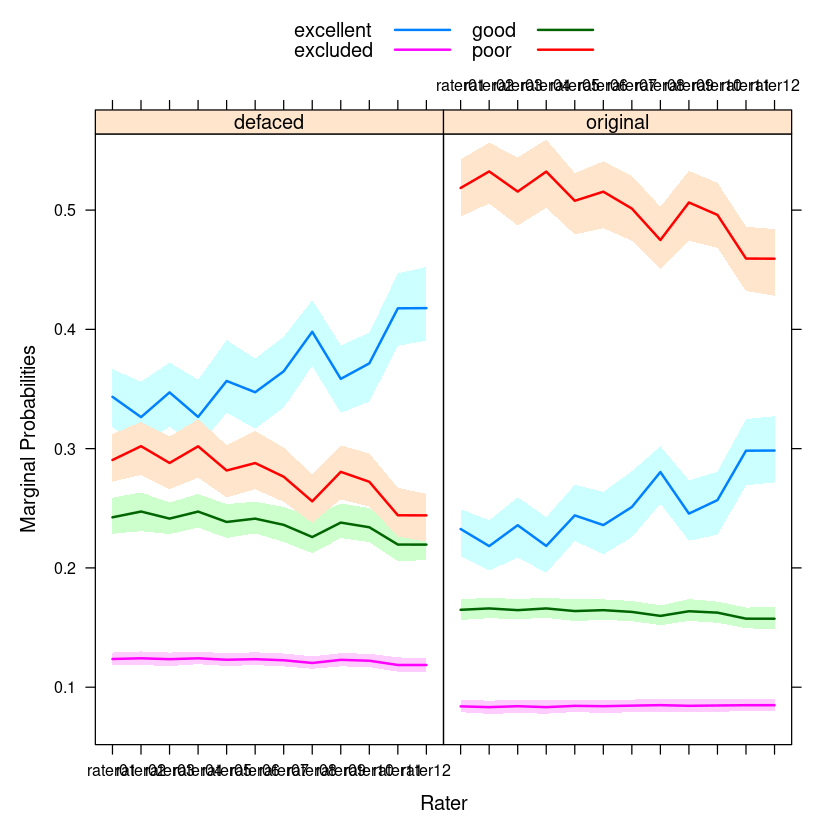

In [10]:
#Extract data for plot
plot_data_m <- effectPlotData(gm, nDF, CR_cohort_varname = "cohort", 
                              direction = "backward")
#Plot
key <- list(space = "top", rep = FALSE,
            text = list(levels(df$ratings)[1:2]),
            lines = list(lty = c(1, 1), lwd = c(2, 2), col = c("#0080ff", "#ff00ff")),
            text = list(levels(df$ratings)[3:4]),
            lines = list(lty = c(1, 1), lwd = c(2, 2), col = c("darkgreen", "#ff0000")))

xyplot(expit(pred) ~ rater | defaced, group = ordinal_response, data = plot_data_m, 
       upper = expit(plot_data_m$upp), low = expit(plot_data_m$low), type = "l",
       panel = function (x, y, ...) {
           panel.superpose(x, y, panel.groups = my_panel_bands, ...)
           panel.xyplot(x, y, lwd = 2, ...)
       }, xlab = "Rater", ylab = "Marginal Probabilities", key = key)